<a href="https://colab.research.google.com/github/waqqasansari/Machine_Learning_Probs/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
print(f'the number of rows in train set {train_df.shape[0]} and {train_df.shape[1]} columns')
print(f'the number of rows in test set {test_df.shape[0]} and {test_df.shape[1]} columns')

the number of rows in train set 891 and 12 columns
the number of rows in test set 418 and 11 columns


In [6]:
print(train_df.head(5))
print(test_df.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df["Cabin"].fillna("0", inplace = True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
train_df["Age"].fillna((train_df['Age'].mean()), inplace = True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [10]:
train_df["Embarked"].fillna("0", inplace = True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [11]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


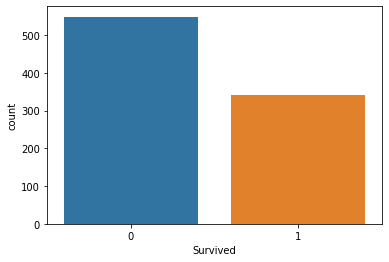

In [16]:
sns.countplot(x="Survived", data=train_df)

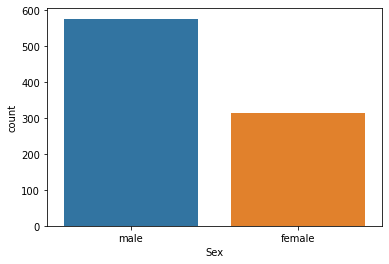

In [17]:
sns.countplot(x="Sex", data=train_df)

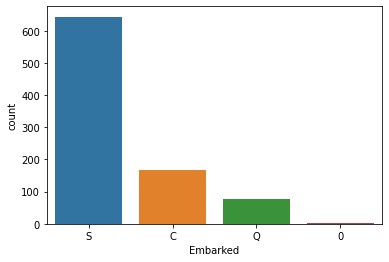

In [18]:
sns.countplot(x="Embarked", data=train_df)

In [19]:
print(round((train_df.Survived.sum() / train_df.Survived.count()) * 100),'%')

38.0 %


##more people died than survived (38% survived)

In [20]:
train_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [21]:
train_df.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

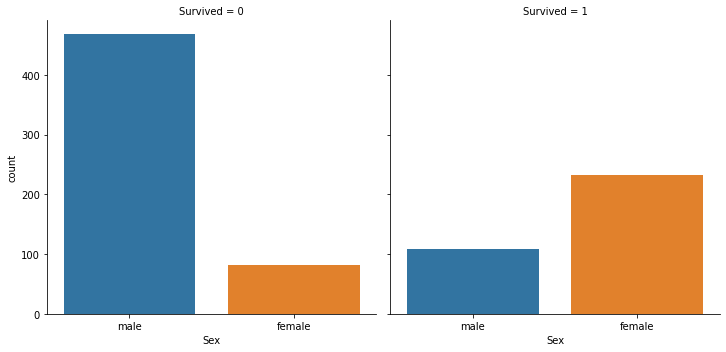

In [22]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = train_df)

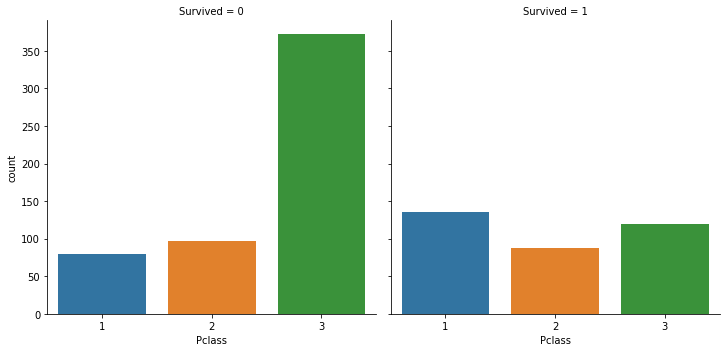

In [23]:
sns.catplot(x = 'Pclass', col = 'Survived', kind = 'count', data = train_df)

In [24]:
print(round((train_df[train_df.Sex == 'female'].Survived.sum() / train_df[train_df.Sex == 'female'].Survived.count()) * 100),'% females are survived')
print(round((train_df[train_df.Sex == 'male'].Survived.sum() / train_df[train_df.Sex == 'male'].Survived.count()) * 100),'% males are survived')

74.0 % females are survived
19.0 % males are survived


In [25]:
print(round((train_df.Survived[train_df.Pclass == 1].sum() / train_df.Survived[train_df.Pclass == 1].count()) * 100), '% of class 1 survived')
print(round((train_df.Survived[train_df.Pclass == 2].sum() / train_df.Survived[train_df.Pclass == 2].count()) * 100), '% of class 2 survived')
print(round((train_df.Survived[train_df.Pclass == 3].sum() / train_df.Survived[train_df.Pclass == 3].count()) * 100), '% of class 3 survived')

63.0 % of class 1 survived
47.0 % of class 2 survived
24.0 % of class 3 survived


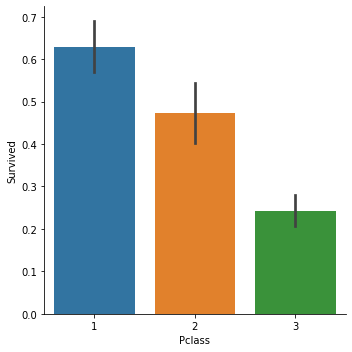

In [26]:
sns.catplot('Pclass','Survived', kind='bar', data=train_df)

In [27]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap = cmap)

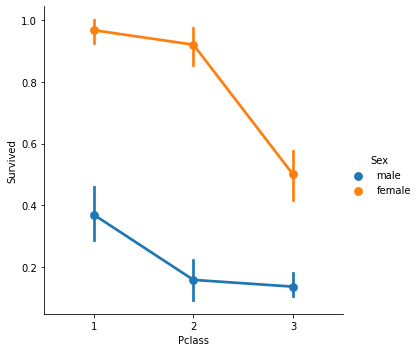

In [28]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data = train_df)

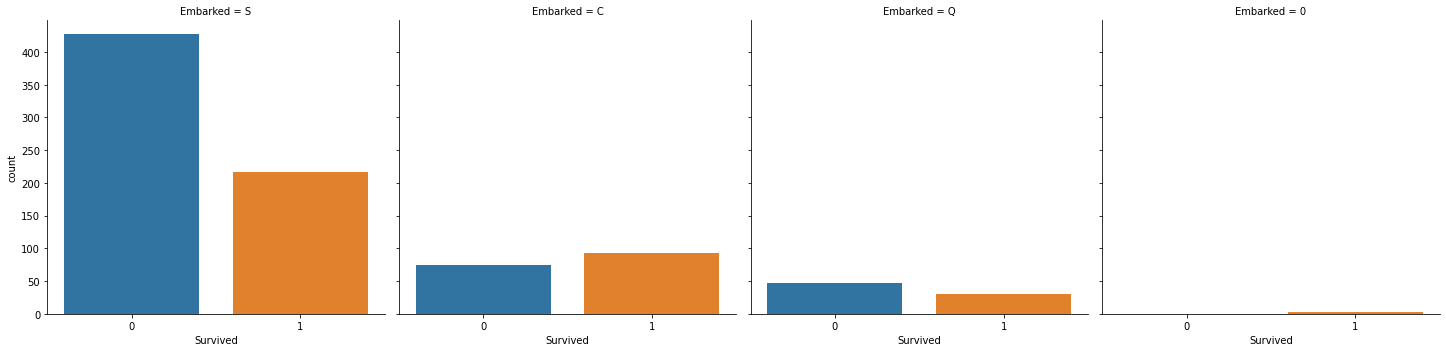

In [29]:
sns.catplot(x = 'Survived', col = 'Embarked', kind='count', data = train_df)

In [30]:
pd.crosstab([train_df.Survived], [train_df.Sex, train_df.Pclass, train_df.Embarked], margins=True).style.background_gradient(cmap=cmap)

In [0]:
train_temp = train_df.copy()
test_temp = test_df.copy()

In [32]:
train_temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [34]:
test_temp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
train_temp.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

In [0]:
train_temp = pd.get_dummies(train_temp, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [0]:
passenger_id = test_temp['PassengerId']
test_temp = pd.get_dummies(test_temp, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [0]:
test_temp.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

In [42]:
train_temp.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,1,0,0,1,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,0,1,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1,0,0
4,0,35.000000,0,0,8.0500,1,0,0,1,0,1
5,0,29.699118,0,0,8.4583,1,0,1,0,0,1
6,0,54.000000,0,0,51.8625,1,0,0,1,0,0
7,0,2.000000,3,1,21.0750,1,0,0,1,0,1
8,1,27.000000,0,2,11.1333,0,0,0,1,0,1
9,1,14.000000,1,0,30.0708,0,1,0,0,1,0


In [43]:
train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Pclass_2    891 non-null    uint8  
 10  Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.2 KB


In [44]:
test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Sex_male    418 non-null    uint8  
 5   Embarked_Q  418 non-null    uint8  
 6   Embarked_S  418 non-null    uint8  
 7   Pclass_2    418 non-null    uint8  
 8   Pclass_3    418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [45]:
test_temp.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


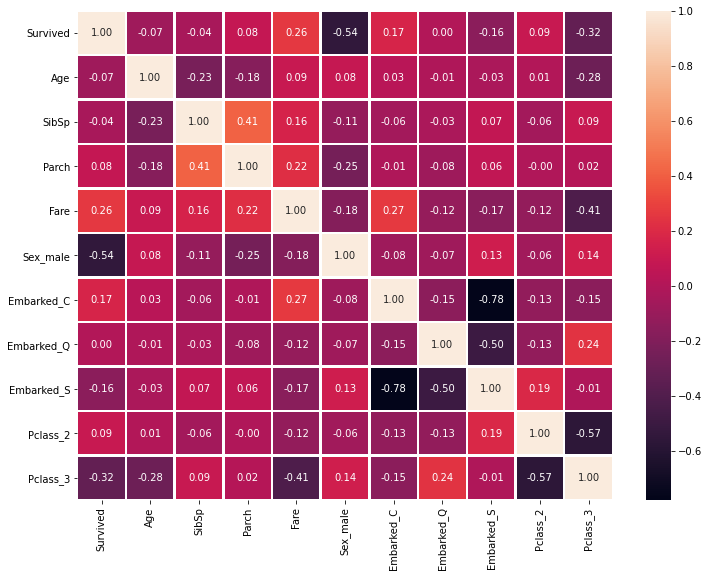

In [46]:
corr = train_temp.corr()

f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [47]:
test_temp

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,1,0,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0
415,38.5,0,0,7.2500,1,0,1,0,1
416,NaN,0,0,8.0500,1,0,1,0,1


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(train_temp.drop('Survived',axis=1))
scaled_features = scaler.transform(train_temp.drop('Survived',axis=1))
X_train_sc = pd.DataFrame(scaled_features, columns=train_temp.columns[:-1])

# test_temp.fillna(test_temp.mean(), inplace=True)
# scaled_features = scaler.transform(test_temp)
# test_sc = pd.DataFrame(scaled_features, columns = test_temp.columns)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_temp.drop('Survived',axis=1), train_temp['Survived'], test_size=0.30, random_state=101)
# X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_train_sc, X_train['Survived'], test_size=0.30, random_state=101)

In [0]:
# unscaled
X_train_all = X_train.drop('Survived',axis=1)
y_train_all = X_train['Survived']
X_test_all = test

# scaled
# X_train_all_sc = X_train_sc
# y_train_all_sc = X_train['Survived']
# X_test_all_sc = df_test_ml_sc

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[137  17]
 [ 39  75]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

0.7910447761194029


In [0]:
clf = xgb.XGBClassifier(learning_rate=0.1, max_depth = len(train_temp['Survived']))

In [91]:
clf.fit(X_train, y_train)
pred_xgbc = clf.predict(X_test)
print(confusion_matrix(y_test, pred_xgbc))
print(classification_report(y_test, pred_xgbc))
print(accuracy_score(y_test, pred_xgbc))

[[140  14]
 [ 33  81]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       154
           1       0.85      0.71      0.78       114

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.82      0.82       268

0.8246268656716418


In [0]:
X_test_all = test_temp
X_test_all.fillna(X_test_all.mean(), inplace=True)
# X_test_all.drop('Embarked_C', axis=1)

In [0]:
X_train_all = train_temp.drop('Survived',axis=1)
y_train_all = train_temp['Survived']
X_train_all = X_train_all.drop('Embarked_C',axis=1)

In [0]:
clf.fit(X_train_all, y_train_all)
pred_all_xgbc = clf.predict(X_test_all)

In [0]:
sub_xgbc = pd.DataFrame()
sub_xgbc['PassengerId'] = test_df['PassengerId']
sub_xgbc['Survived'] = pred_all_xgbc
sub_xgbc.to_csv('xgb.csv', index=False)

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[134  20]
 [ 37  77]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

0.7873134328358209


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [64]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[138  16]
 [ 65  49]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       154
           1       0.75      0.43      0.55       114

    accuracy                           0.70       268
   macro avg       0.72      0.66      0.66       268
weighted avg       0.71      0.70      0.68       268

0.6977611940298507


In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       154
           1       0.74      0.64      0.69       114

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

0.75


In [67]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       154
           1       0.82      0.64      0.72       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268

0.7873134328358209


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[142  12]
 [ 40  74]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       154
           1       0.86      0.65      0.74       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

0.8059701492537313


In [70]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
pred_svc = svc.predict(X_test)
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))

[[123  31]
 [ 44  70]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       154
           1       0.69      0.61      0.65       114

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268

0.7201492537313433
